In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("../data/raw/emails.csv")

# Basic overview of the dataset 
print("Dataset Shape:", df.shape)
print("\nColumns:\n", df.columns)

# first few rows fo the dataset
df.head()


Dataset Shape: (5172, 3002)

Columns:
 Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [3]:
# Info and missing values
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

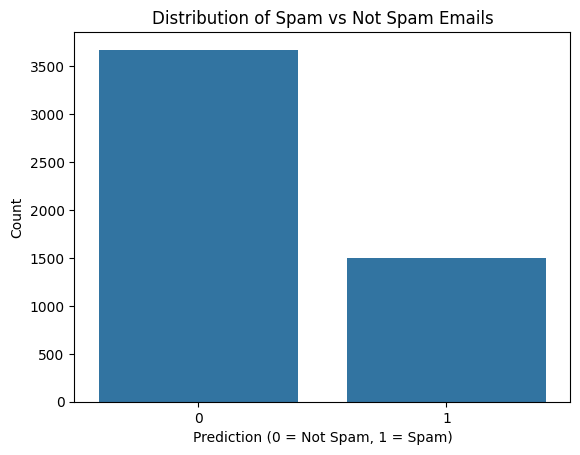

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Prediction', data=df)
plt.title('Distribution of Spam vs Not Spam Emails')
plt.xlabel('Prediction (0 = Not Spam, 1 = Spam)')
plt.ylabel('Count')
plt.show()


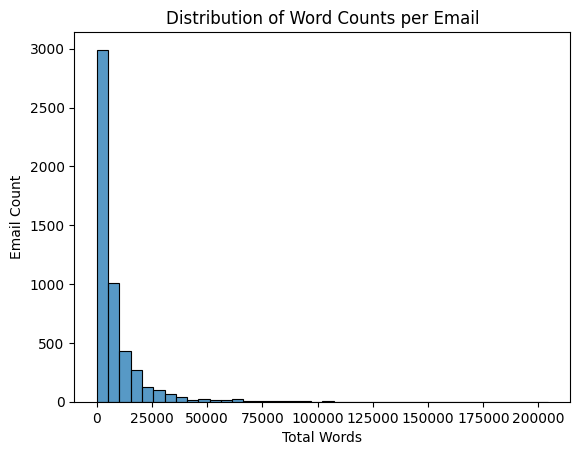

In [20]:
# Total words in each email
df['total_words'] = df.drop(columns=['Email No.', 'Prediction']).sum(axis=1)

sns.histplot(df['total_words'], bins=40)
plt.title("Distribution of Word Counts per Email")
plt.xlabel("Total Words")
plt.ylabel("Email Count")
plt.show()


In [21]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction,total_words
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,371
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,1,0,0,15421
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,791
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,7133
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,1,0,0,7525


In [22]:
print("Sumamry of total words per emai: - ")
print(df['total_words'].describe())

Sumamry of total words per emai: - 
count      5172.000000
mean       8157.026102
std       12321.045611
min          56.000000
25%        1804.250000
50%        4039.000000
75%        9334.500000
max      204246.000000
Name: total_words, dtype: float64


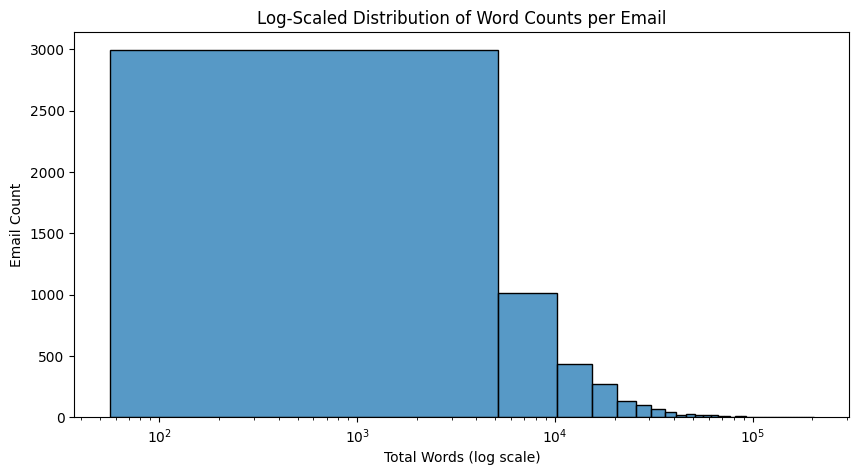

In [23]:
plt.figure(figsize=(10, 5))
sns.histplot(df['total_words'], bins=40)
plt.xscale('log')
plt.title("Log-Scaled Distribution of Word Counts per Email")
plt.xlabel("Total Words (log scale)")
plt.ylabel("Email Count")
plt.show()

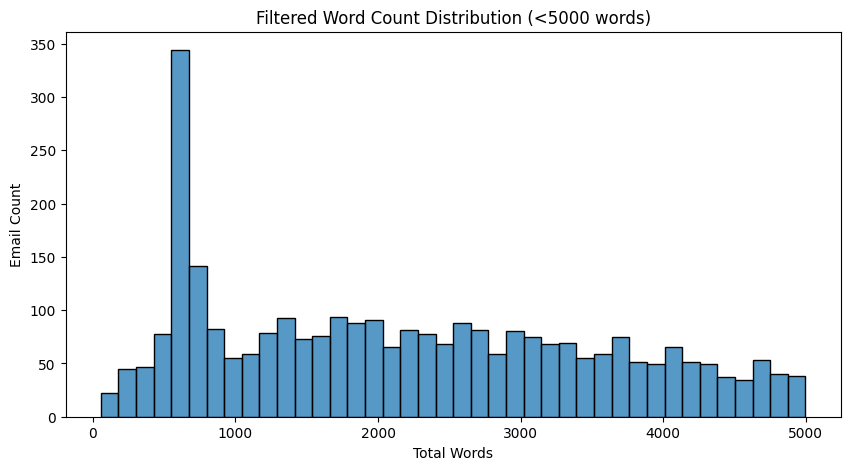

In [ ]:
# Remove outliers (emails with > 5000 words) and re-plot
filtered_df = df[df['total_words'] < 5000]

plt.figure(figsize=(10, 5))
sns.histplot(filtered_df['total_words'], bins=40)
plt.title("Filtered Word Count Distribution (<5000 words)")
plt.xlabel("Total Words")
plt.ylabel("Email Count")
plt.show()

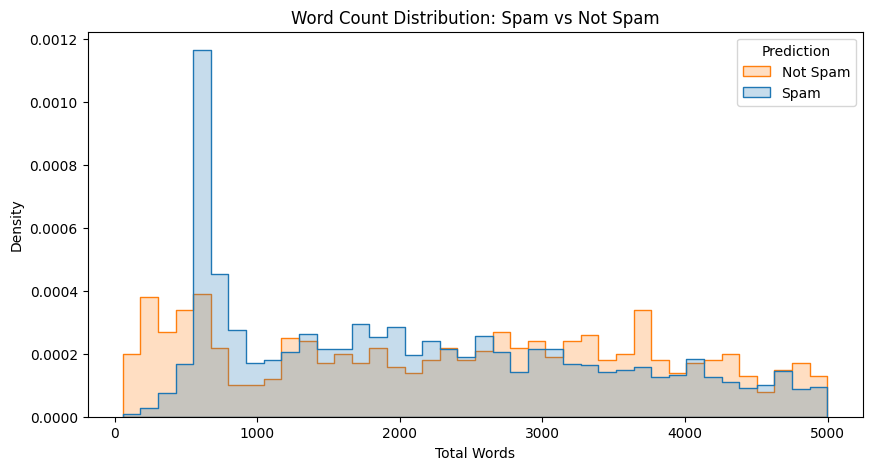

In [ ]:
# Compare spam vs not-spam word counts
plt.figure(figsize=(10, 5))
sns.histplot(data=filtered_df, x='total_words', hue='Prediction', bins=40, element='step', stat='density', common_norm=False)
plt.title("Word Count Distribution: Spam vs Not Spam")
plt.xlabel("Total Words")
plt.ylabel("Density")
plt.legend(title='Prediction', labels=['Not Spam', 'Spam'])
plt.show()